# STopover_cosmx sample code

## Load STopover & Prepare

In [1]:
from STopover import STopover_cosmx

In [2]:
import pandas as pd
import numpy as np
import scanpy as sc

### Download CosMx SMI dataset (Lung 5-1: Data Files)

#### https://nanostring.com/resources/smi-ffpe-dataset-lung5-rep1-data/

#### https://nanostring-public-share.s3.us-west-2.amazonaws.com/SMI-Compressed/SMI-ReadMe.html

In [3]:
data_path = './Lung5_Rep1/Lung5_Rep1-Flat_files_and_images'

### Create directory to save file

In [4]:
import os
save_dir = './Test'

In [ ]:
os.mkdir(save_dir)

### Read single-cell dataset (GSE131907) with cell type annotation in .obs as 'Cell_subtype'

##### Cells with 'Sample_Origin = tLung' were subsetted for analysis

In [5]:
sc_adata = sc.read_h5ad('sc_lung_cancer.h5ad')

In [6]:
sc_adata = sc_adata[sc_adata.obs['Sample_Origin']=='tLung']

In [7]:
sc_adata

View of AnnData object with n_obs × n_vars = 45149 × 29634
    obs: 'Barcode', 'Sample', 'Sample_Origin', 'Cell_type', 'Cell_type.refined', 'Cell_subtype'

##### Reassign Undetermined and NaN in 'Cell_subtype' into _ns subtype

In [8]:
sc_adata.obs['Cell_subtype'] = sc_adata.obs['Cell_subtype'].astype(object)
sc_adata.obs['Cell_type'] = sc_adata.obs['Cell_type'].astype(object)

sc_adata.obs['Cell_subtype'] = sc_adata.obs['Cell_subtype'].where(sc_adata.obs['Cell_subtype'].ne('Undetermined'), sc_adata.obs['Cell_type']+'_ns')
sc_adata.obs['Cell_subtype'] = sc_adata.obs['Cell_subtype'].fillna(sc_adata.obs['Cell_type']+'_ns')

In [9]:
sc_adata.obs

,Barcode,Sample,Sample_Origin,Cell_type,Cell_type.refined,Cell_subtype
AAACCTGAGACGACGT_LUNG_T09,AAACCTGAGACGACGT,LUNG_T09,tLung,Myeloid cells,Myeloid cells,CD1c+ DCs
AAACCTGAGACGACGT_LUNG_T34,AAACCTGAGACGACGT,LUNG_T34,tLung,B lymphocytes,B lymphocytes,Follicular B cells
AAACCTGAGACGCTTT_LUNG_T18,AAACCTGAGACGCTTT,LUNG_T18,tLung,Epithelial cells,Epithelial cells,tS2
AAACCTGAGACTGTAA_LUNG_T34,AAACCTGAGACTGTAA,LUNG_T34,tLung,Epithelial cells,Epithelial cells,tS2
AAACCTGAGATATGCA_LUNG_T25,AAACCTGAGATATGCA,LUNG_T25,tLung,T lymphocytes,T/NK cells,CD4+ Th
...,...,...,...,...,...,...
TTTGTCATCTCACATT_LUNG_T31,TTTGTCATCTCACATT,LUNG_T31,tLung,T lymphocytes,T/NK cells,CD8+/CD4+ Mixed Th
TTTGTCATCTGCGACG_LUNG_T31,TTTGTCATCTGCGACG,LUNG_T31,tLung,Fibroblasts,NaN,Fibroblasts_ns
TTTGTCATCTTGCCGT_LUNG_T30,TTTGTCATCTTGCCGT,LUNG_T30,tLung,Epithelial cells,Epithelial cells,tS1
TTTGTCATCTTTACAC_LUNG_T25,TTTGTCATCTTTACAC,LUNG_T25,tLung,B lymphocytes,B lymphocytes,Follicular B cells


## Create STopover_cosmx object  
### (annotate cells & convert to grid-based data)

In [ ]:
help(STopover_cosmx)

In [11]:
sp_adata = STopover_cosmx(sp_load_path=data_path, sc_adata=sc_adata, sc_celltype_colname = 'Cell_subtype', 
                          sc_norm_total=1e3,
                          tx_file_name = 'Lung5_Rep1_tx_file.csv', cell_exprmat_file_name='Lung5_Rep1_exprMat_file.csv', 
                          cell_metadata_file_name='Lung5_Rep1_metadata_file.csv', 
                          x_bins=100, y_bins=100, min_size=20, fwhm=2.5, thres_per=30, save_path=save_dir)

Anndata object is not provided: searching for files in 'sp_load_path'
End of grid-based aggregation of CosMx: 67.28 seconds
End of generating grid-based count matrix: 78.22 seconds
End of creating CosMx cell-level anndata: 81.67 seconds
End of annotating CosMx cell-level anndata: 259.02 seconds
End of generating grid-based cell type abundance metadata: 268.31 seconds
End of generating grid-based CosMx spatial anndata: 268.74 seconds


In [12]:
sp_adata

AnnData object with n_obs × n_vars = 9762 × 980
    obs: 'array_col', 'array_row', 'Activated DCs', 'Alveolar Mac', 'B lymphocytes_ns', 'CD141+ DCs', 'CD163+CD14+ DCs', 'CD1c+ DCs', 'CD207+CD1a+ LCs', 'CD4+ Th', 'CD8 low T', 'CD8+/CD4+ Mixed Th', 'COL13A1+ matrix FBs', 'COL14A1+ matrix FBs', 'Cytotoxic CD8+ T', 'EPCs', 'Endothelial cells_ns', 'Epithelial cells_ns', 'Exhausted CD8+ T', 'Exhausted Tfh', 'Fibroblasts_ns', 'Follicular B cells', 'GC B cells in the DZ', 'GC B cells in the LZ', 'Lymphatic ECs', 'MALT B cells', 'MAST', 'Mesothelial cells', 'Monocytes', 'Myeloid cells_ns', 'Myofibroblasts', 'NK', 'NK cells_ns', 'Naive CD4+ T', 'Naive CD8+ T', 'Pericytes', 'Plasma cells', 'Pleural Mac', 'Smooth muscle cells', 'Stalk-like ECs', 'T lymphocytes_ns', 'Tip-like ECs', 'Treg', 'Tumor ECs', 'mo-Mac', 'pDCs', 'tS1', 'tS2', 'tS3'
    uns: 'tx_by_cell_grid', 'adata_cell', 'x_bins', 'y_bins', 'sc_norm_total', 'sc_celltype_colname', 'transcript_colname', 'min_size', 'fwhm', 'thres_per', 'obs

In [13]:
sp_adata.obs

,array_col,array_row,Activated DCs,Alveolar Mac,B lymphocytes_ns,CD141+ DCs,CD163+CD14+ DCs,CD1c+ DCs,CD207+CD1a+ LCs,CD4+ Th,...,Stalk-like ECs,T lymphocytes_ns,Tip-like ECs,Treg,Tumor ECs,mo-Mac,pDCs,tS1,tS2,tS3
0_0,0,0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,2.950946,...,0.0,2.535000,0.000000,1.000000,0.000000,0.062963,0.0,0.0,0.0,0.0
0_1,0,1,0.0,0.0,0.000000,1.0,0.000000,0.0,0.0,2.022027,...,0.0,3.474786,0.000000,0.000000,0.000000,0.066667,0.0,0.0,0.0,0.0
0_2,0,2,0.0,0.0,1.031915,0.0,0.000000,0.0,0.0,0.000000,...,0.0,5.261226,1.631791,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0
0_3,0,3,2.0,0.0,0.968085,0.0,0.000000,0.0,0.0,1.000000,...,0.0,2.944203,0.368209,0.000000,1.708978,1.000000,0.0,0.0,0.0,0.0
0_4,0,4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,4.104348,0.000000,1.000000,0.291022,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99_95,99,95,0.0,0.0,0.050607,0.0,2.946429,0.0,0.0,0.815789,...,0.0,0.567766,0.000000,0.000000,0.002252,0.000000,0.0,0.0,0.0,0.0
99_96,99,96,0.0,0.0,0.000000,0.0,0.227484,0.0,0.0,2.070735,...,0.0,2.000000,0.000000,0.000000,3.997748,0.762244,0.0,0.0,0.0,0.0
99_97,99,97,0.0,0.0,0.000000,0.0,0.826087,0.0,0.0,4.940714,...,0.0,3.344949,0.000000,0.000000,0.000000,0.138914,0.0,0.0,0.0,0.0
99_98,99,98,0.0,0.0,2.390411,0.0,0.015625,0.0,0.0,8.526227,...,0.0,8.204819,0.000000,0.246032,0.000000,0.000000,0.0,0.0,0.0,0.0


### Visualize spatial cell annotation

#### Remove cell types that end with '_ns'

In [14]:
sp_adata_cell = sp_adata.uns['adata_cell']
sp_adata_cell_sub = sp_adata_cell[~sp_adata_cell.obs['Cell_subtype'].str.contains('_ns')]

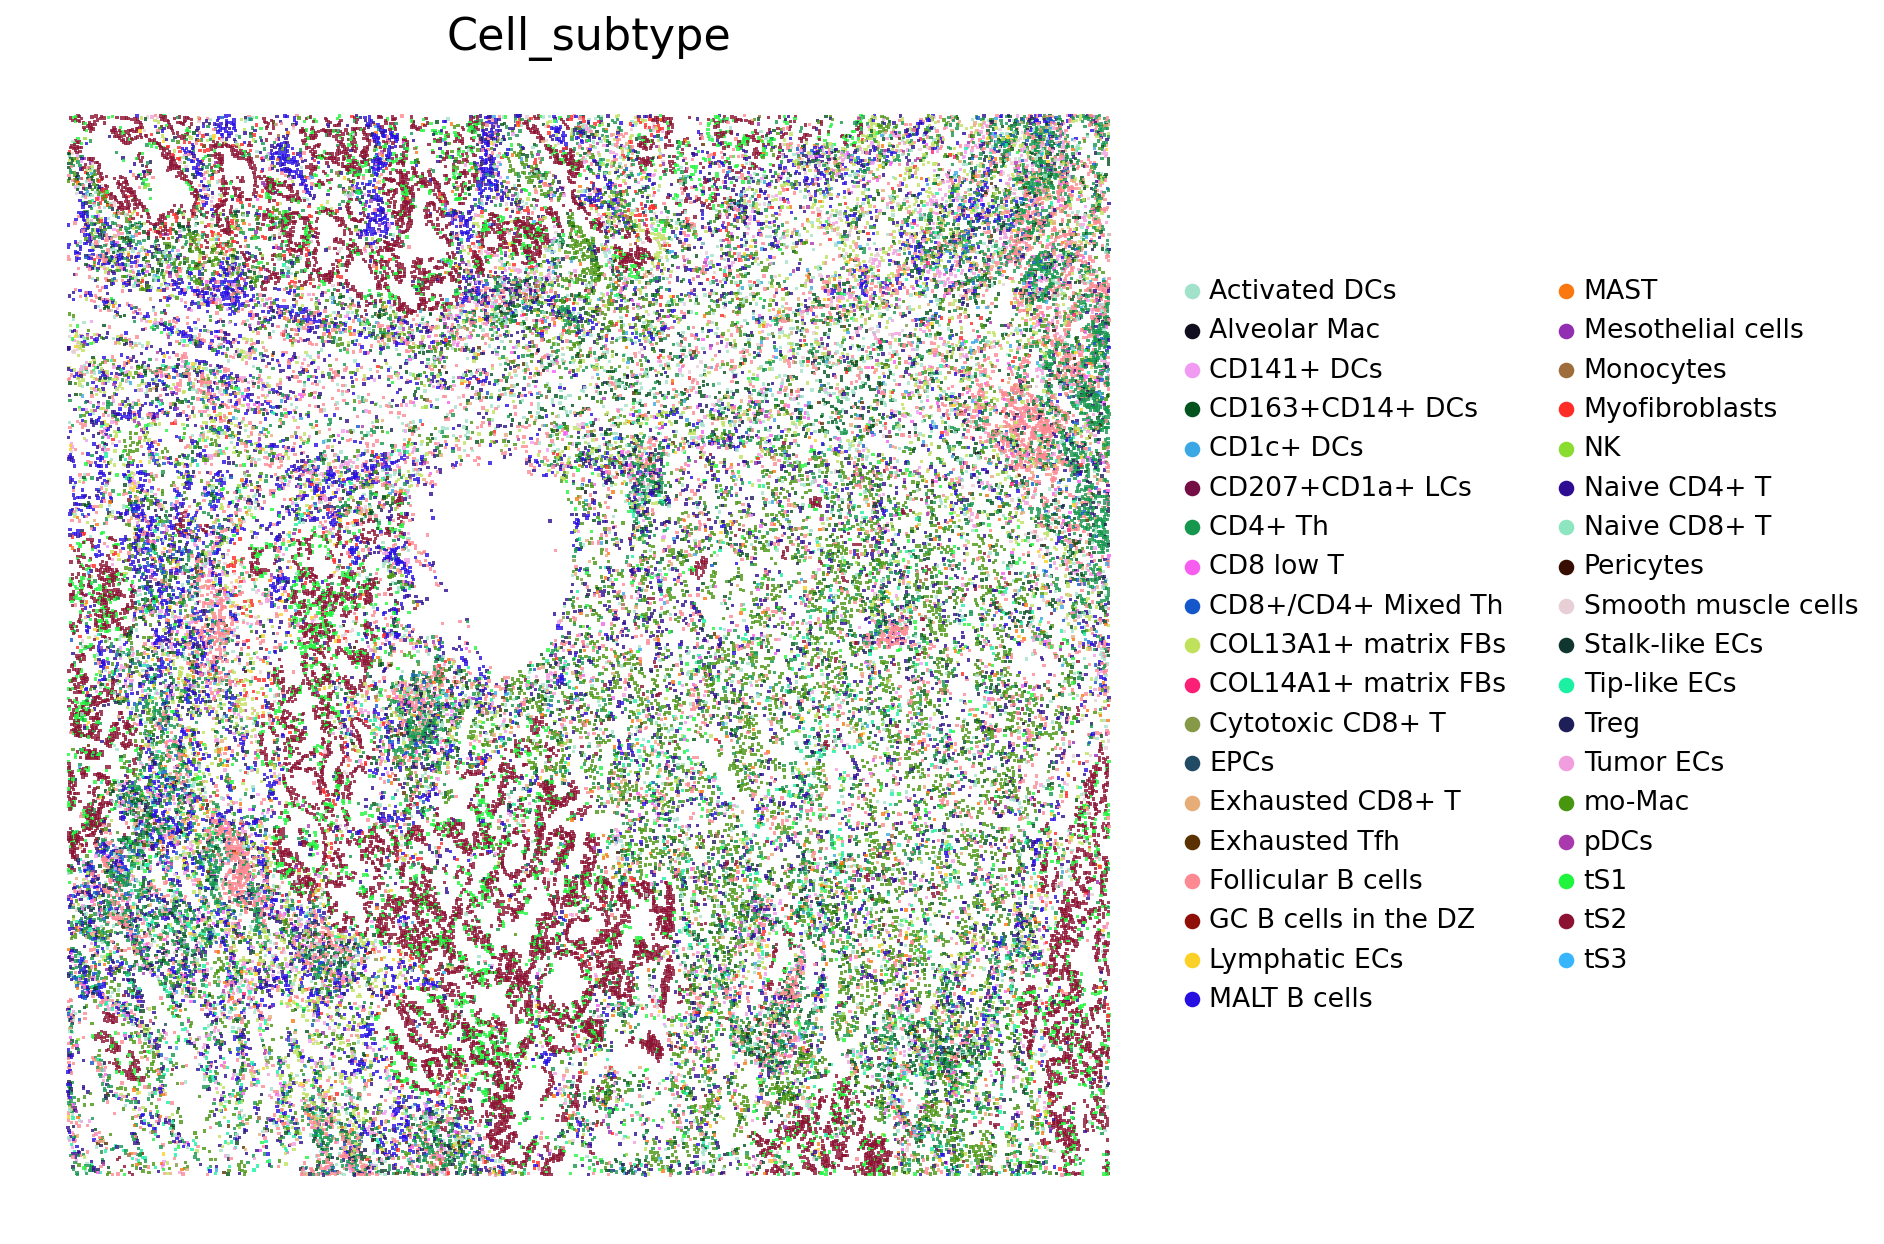

In [15]:
sp_adata_cell_sub = STopover_cosmx(sp_adata=sp_adata_cell_sub, sc_celltype_colname = 'Cell_subtype',
                                   min_size=20, fwhm=2.5, thres_per=30, save_path='./Results')

sp_adata_cell_sub.vis_spatial_cosmx(feat_name='Cell_subtype', title_fontsize=20, dot_size=1.5,
                                    fig_size=(12,8), legend_fontsize=12, save=True, dpi=200)

## Topological similarity analysis

In [16]:
cell_subtypes_list = sp_adata.obs.columns[2:]
cell_subtypes_list

Index(['Activated DCs', 'Alveolar Mac', 'B lymphocytes_ns', 'CD141+ DCs',
       'CD163+CD14+ DCs', 'CD1c+ DCs', 'CD207+CD1a+ LCs', 'CD4+ Th',
       'CD8 low T', 'CD8+/CD4+ Mixed Th', 'COL13A1+ matrix FBs',
       'COL14A1+ matrix FBs', 'Cytotoxic CD8+ T', 'EPCs',
       'Endothelial cells_ns', 'Epithelial cells_ns', 'Exhausted CD8+ T',
       'Exhausted Tfh', 'Fibroblasts_ns', 'Follicular B cells',
       'GC B cells in the DZ', 'GC B cells in the LZ', 'Lymphatic ECs',
       'MALT B cells', 'MAST', 'Mesothelial cells', 'Monocytes',
       'Myeloid cells_ns', 'Myofibroblasts', 'NK', 'NK cells_ns',
       'Naive CD4+ T', 'Naive CD8+ T', 'Pericytes', 'Plasma cells',
       'Pleural Mac', 'Smooth muscle cells', 'Stalk-like ECs',
       'T lymphocytes_ns', 'Tip-like ECs', 'Treg', 'Tumor ECs', 'mo-Mac',
       'pDCs', 'tS1', 'tS2', 'tS3'],
      dtype='object')

#### Create list of cell type pairs

In [17]:
cell_type_pairs = [(cell_subtypes_list[idx_i], cell_subtypes_list[idx_j]) \
                   for idx_i in range(len(cell_subtypes_list)) \
                   for idx_j in range(idx_i+1, len(cell_subtypes_list))]

### 1. Extract colocalized regions between cell types

#### Visualize spatial feature map

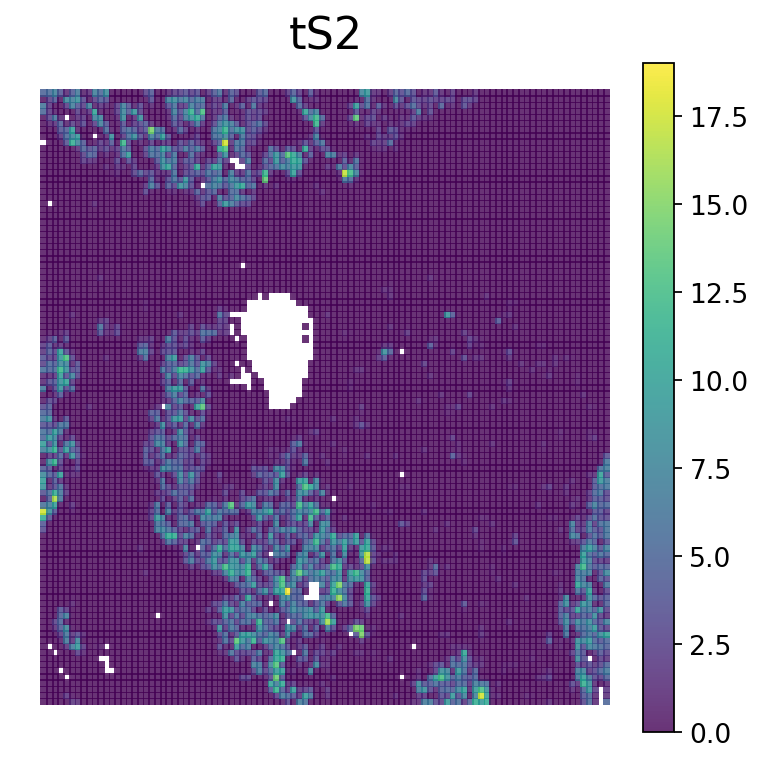

In [18]:
sp_adata.vis_spatial_cosmx(feat_name='tS2', fig_size=(5,5), title_fontsize=20, 
                           legend_fontsize=12, save=True, return_axis=False, dpi=200)

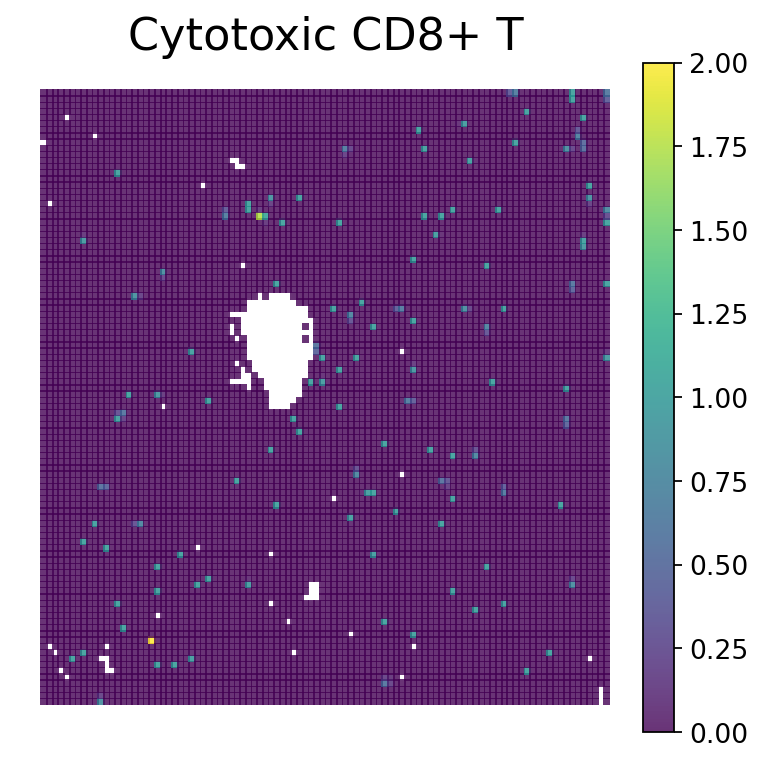

In [19]:
sp_adata.vis_spatial_cosmx(feat_name='Cytotoxic CD8+ T', fig_size=(5,5), title_fontsize=20, 
                           legend_fontsize=12, save=True, return_axis=False,  dpi=200)

#### Extract colocalization patterns btw cell types

In [20]:
sp_adata.topological_similarity(feat_pairs=cell_type_pairs, J_result_name='result')

End of data preparation
Elapsed time: 0.21 seconds 
Calculation for adjacency matrix and mask


  0%|          | 0/1 [00:00<?, ?it/s]

Calculation for connected components for each feature


  0%|          | 0/44 [00:00<?, ?it/s]

Calculation for composite jaccard indexes between feature pairs


  0%|          | 0/946 [00:00<?, ?it/s]

End of the whole process: 111.35 seconds


#### Save STopover object
##### Cell annotation data in sp_adata.uns['adata_cell'] is saved separately

In [21]:
sp_adata.save_connected_loc_data(save_format='h5ad', filename = 'sp_grid_celltype_interact')

Saving anndata in .uns separately as .h5ad: adata_cell


#### Visualize colocalized regions of a cell type pair

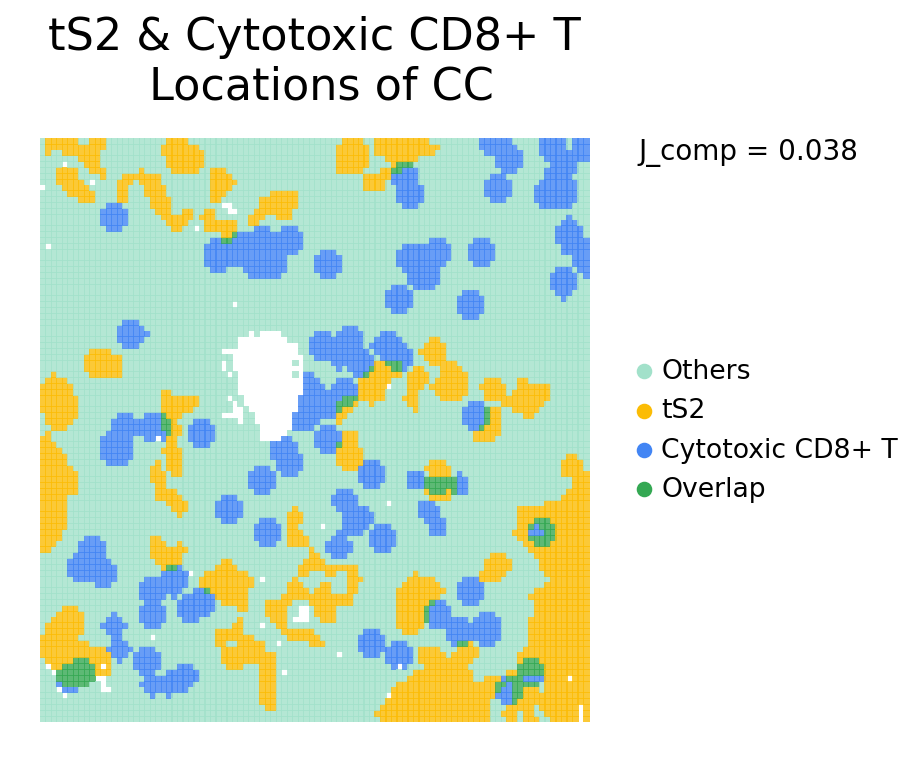

In [22]:
sp_adata.vis_all_connected(feat_name_x='tS2', feat_name_y='Cytotoxic CD8+ T',
                           alpha = 0.8, dot_size=3,
                           fig_size=(6,5), title_fontsize = 20, legend_fontsize = 12, 
                           title = '\n Locations of CC', return_axis=False, save=True, dpi=200)

#### Visualize top 8 regions with high local overlap

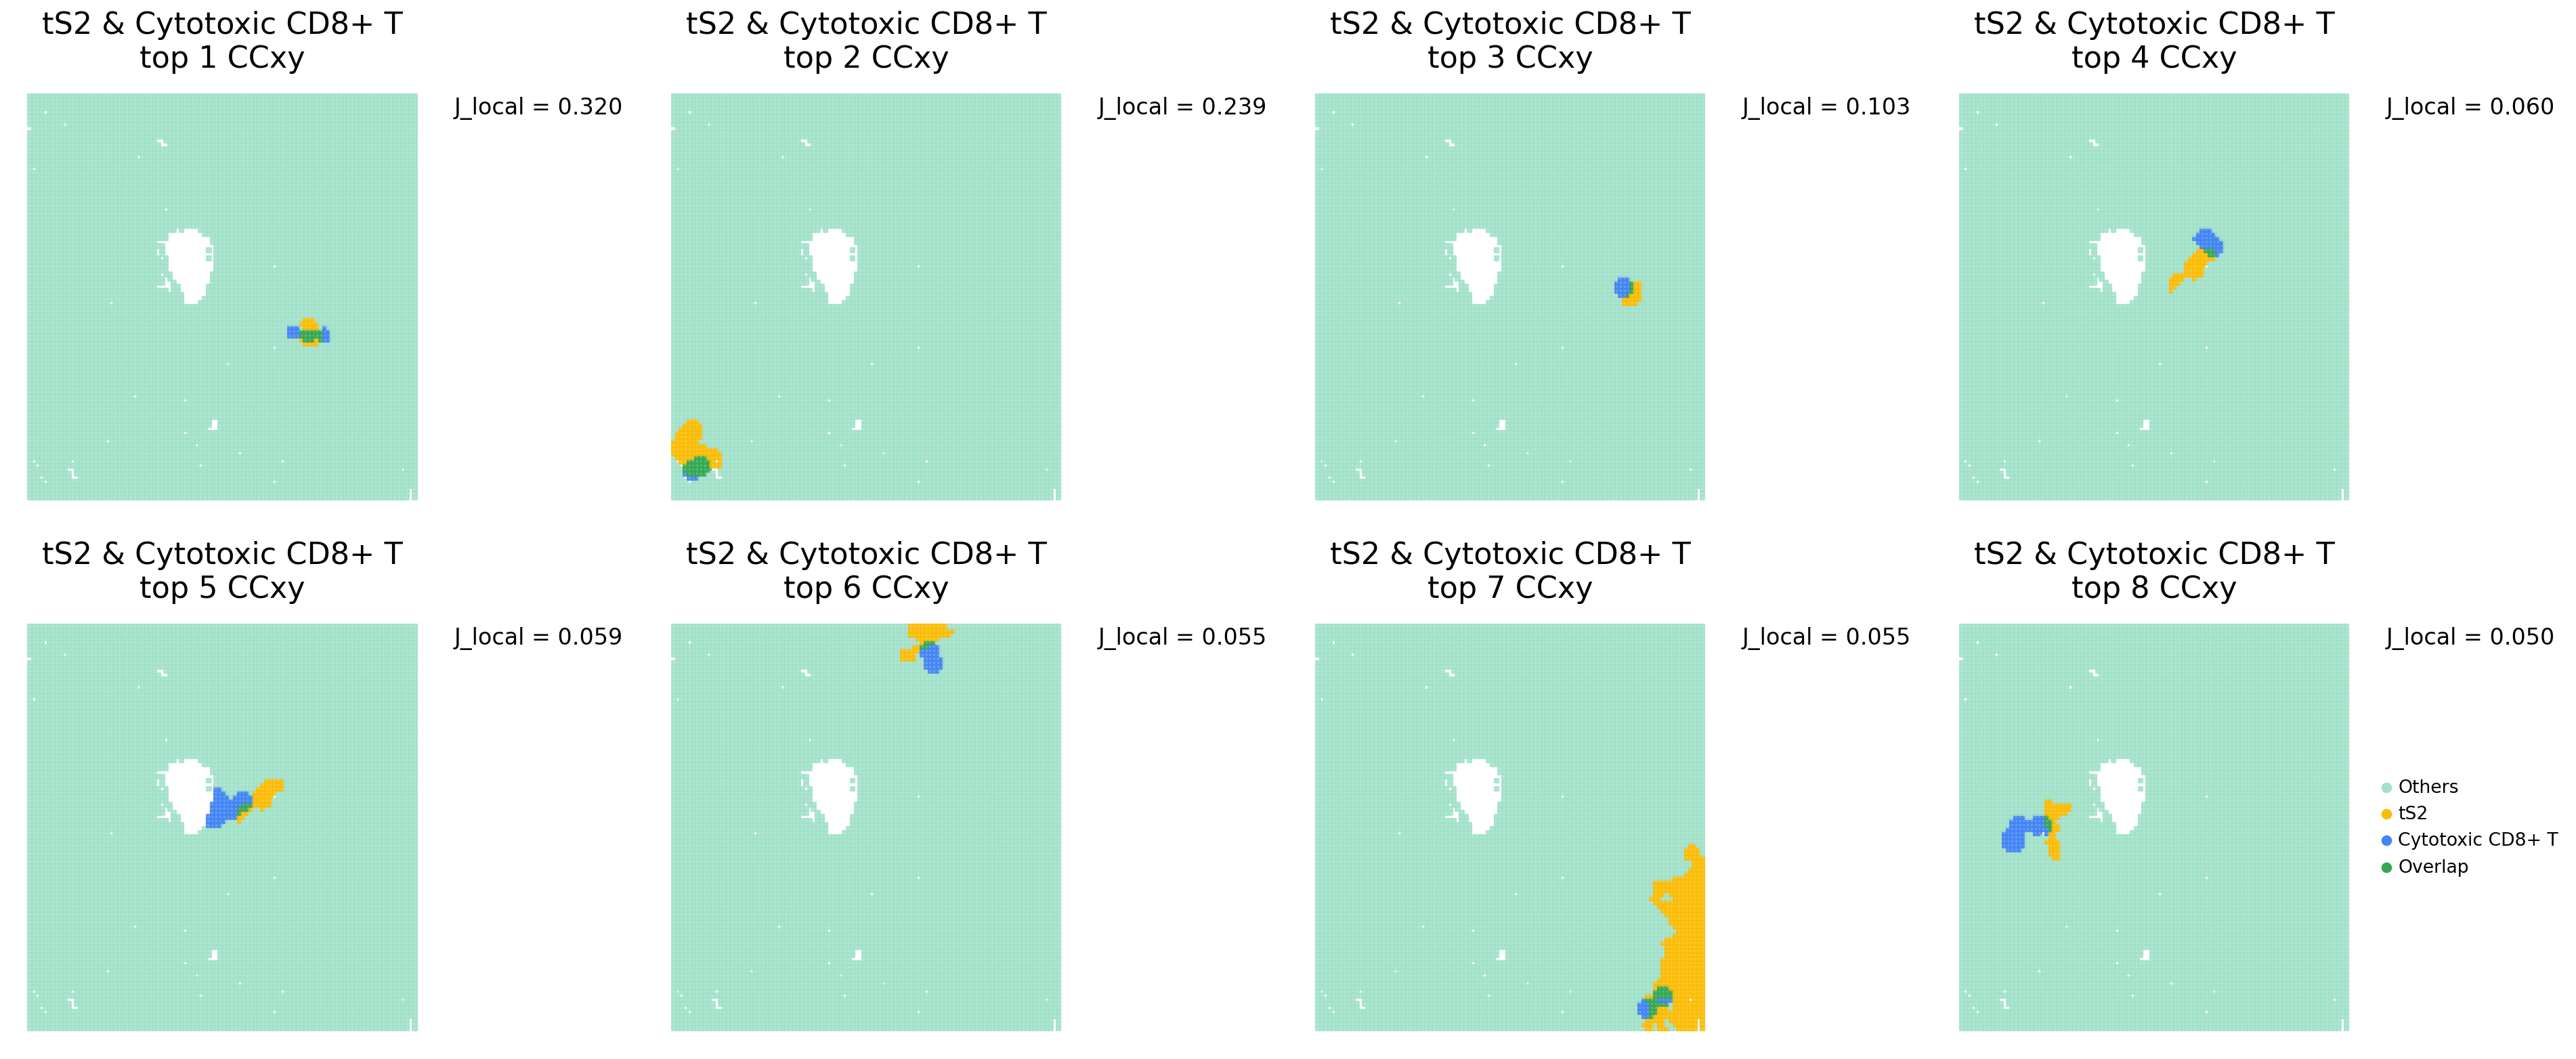

In [23]:
sp_adata.vis_jaccard_top_n_pair(feat_name_x='tS2', feat_name_y='Cytotoxic CD8+ T',
                                top_n = 8, ncol = 4, alpha = 0.8, dot_size=3,
                                fig_size = (6,5), title_fontsize = 20, legend_fontsize = 12,
                                title = '', return_axis=False, save=True, dpi=200)

### 2. Extract colocalized regions btw LR pairs 
#### (CellTalk DB)

#### Visualize feature map for LR pairs

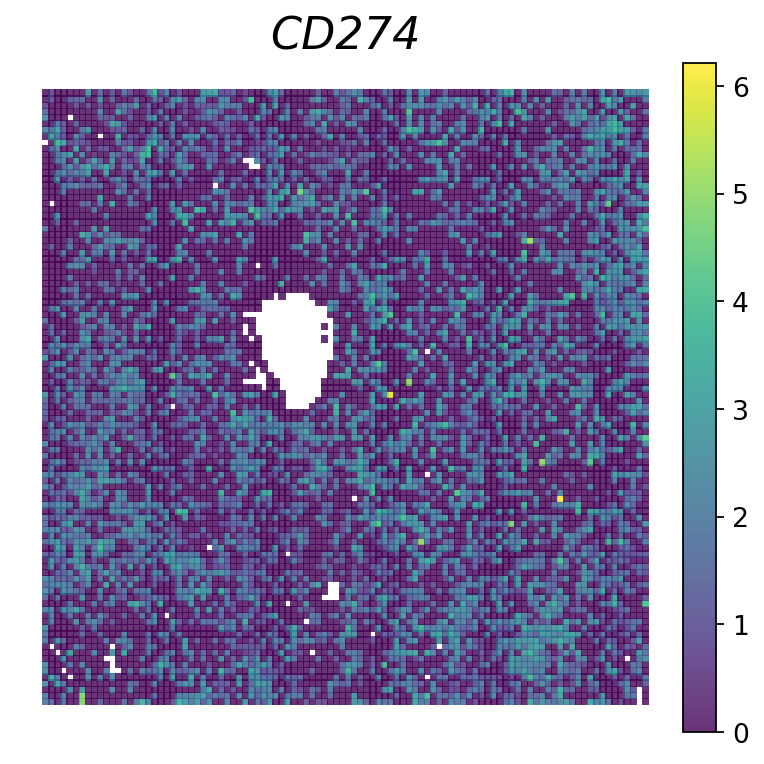

In [24]:
sp_adata.vis_spatial_cosmx(feat_name='CD274', fig_size=(5,5), title_fontsize=20, 
                           legend_fontsize=12, save=True, return_axis=False,  dpi=200)

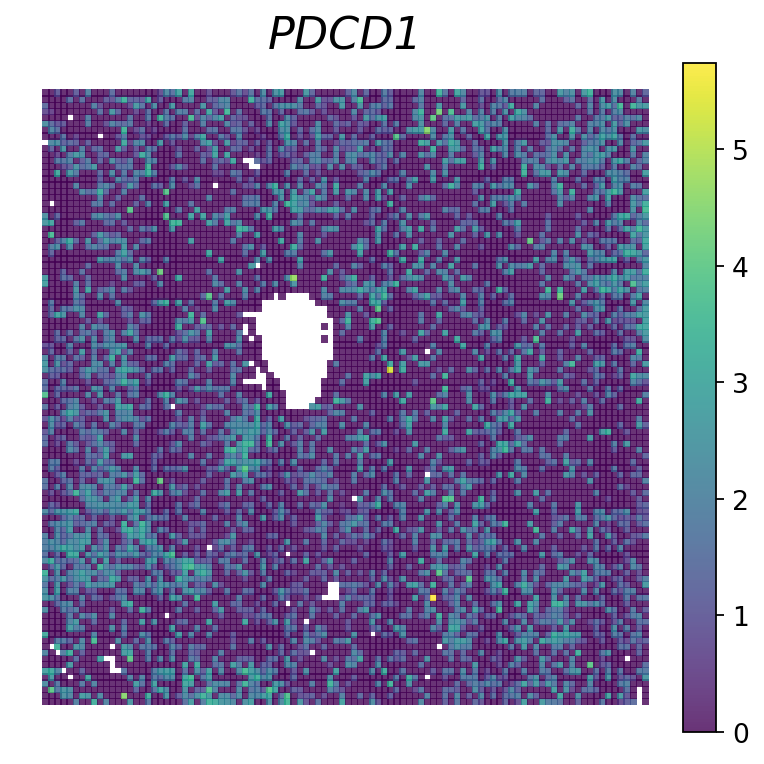

In [25]:
sp_adata.vis_spatial_cosmx(feat_name='PDCD1', fig_size=(5,5), title_fontsize=20, 
                           legend_fontsize=12, save=True, return_axis=False,  dpi=200)

#### Extract colocalization patterns between LR pairs

In [26]:
sp_adata.topological_similarity(use_lr_db=True, lr_db_species='human', J_result_name='result')

Using CellTalkDB ligand-receptor dataset
End of data preparation
Elapsed time: 0.59 seconds 
Calculation for adjacency matrix and mask


  0%|          | 0/1 [00:00<?, ?it/s]

Calculation for connected components for each feature


  0%|          | 0/442 [00:00<?, ?it/s]

Calculation for composite jaccard indexes between feature pairs


  0%|          | 0/728 [00:00<?, ?it/s]

End of the whole process: 575.98 seconds


#### Save STopover object to the save_dir

In [27]:
sp_adata.save_connected_loc_data(save_format='h5ad', filename = 'sp_grid_lr_interact')

Saving anndata in .uns separately as .h5ad: adata_cell


#### Visualize colocalized regions of LR

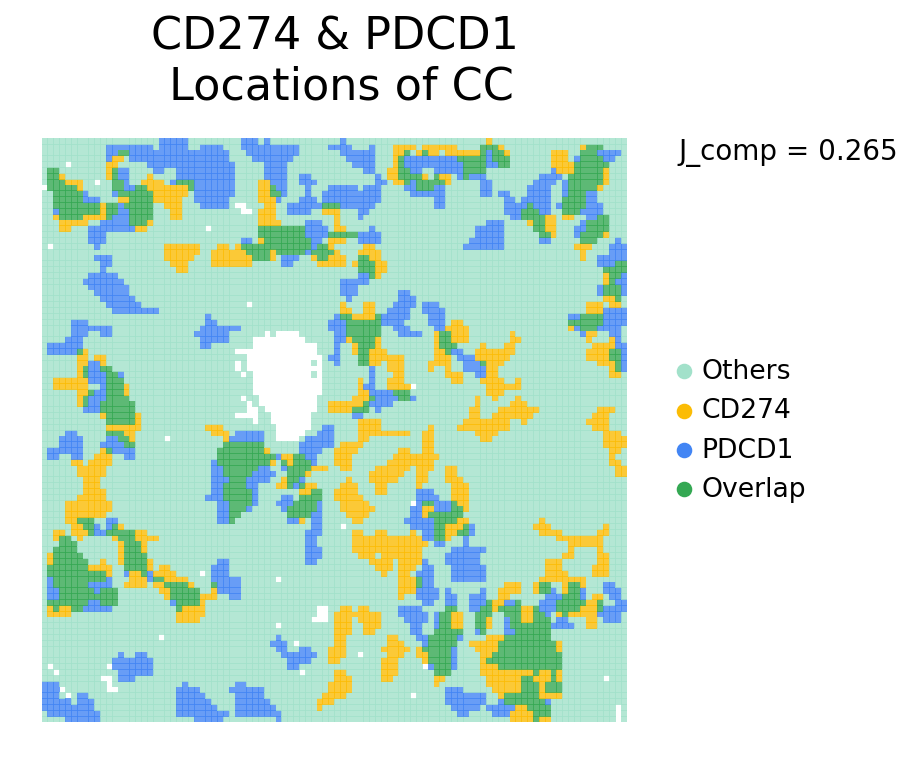

In [28]:
sp_adata.vis_all_connected(feat_name_x='CD274', feat_name_y='PDCD1',
                           alpha = 0.8, dot_size=3,
                           fig_size=(6,5), title_fontsize = 20, legend_fontsize = 12, 
                           title = '\n Locations of CC', return_axis=False, save=True, dpi=200)

#### Visualize top 8 regions with high local overlap

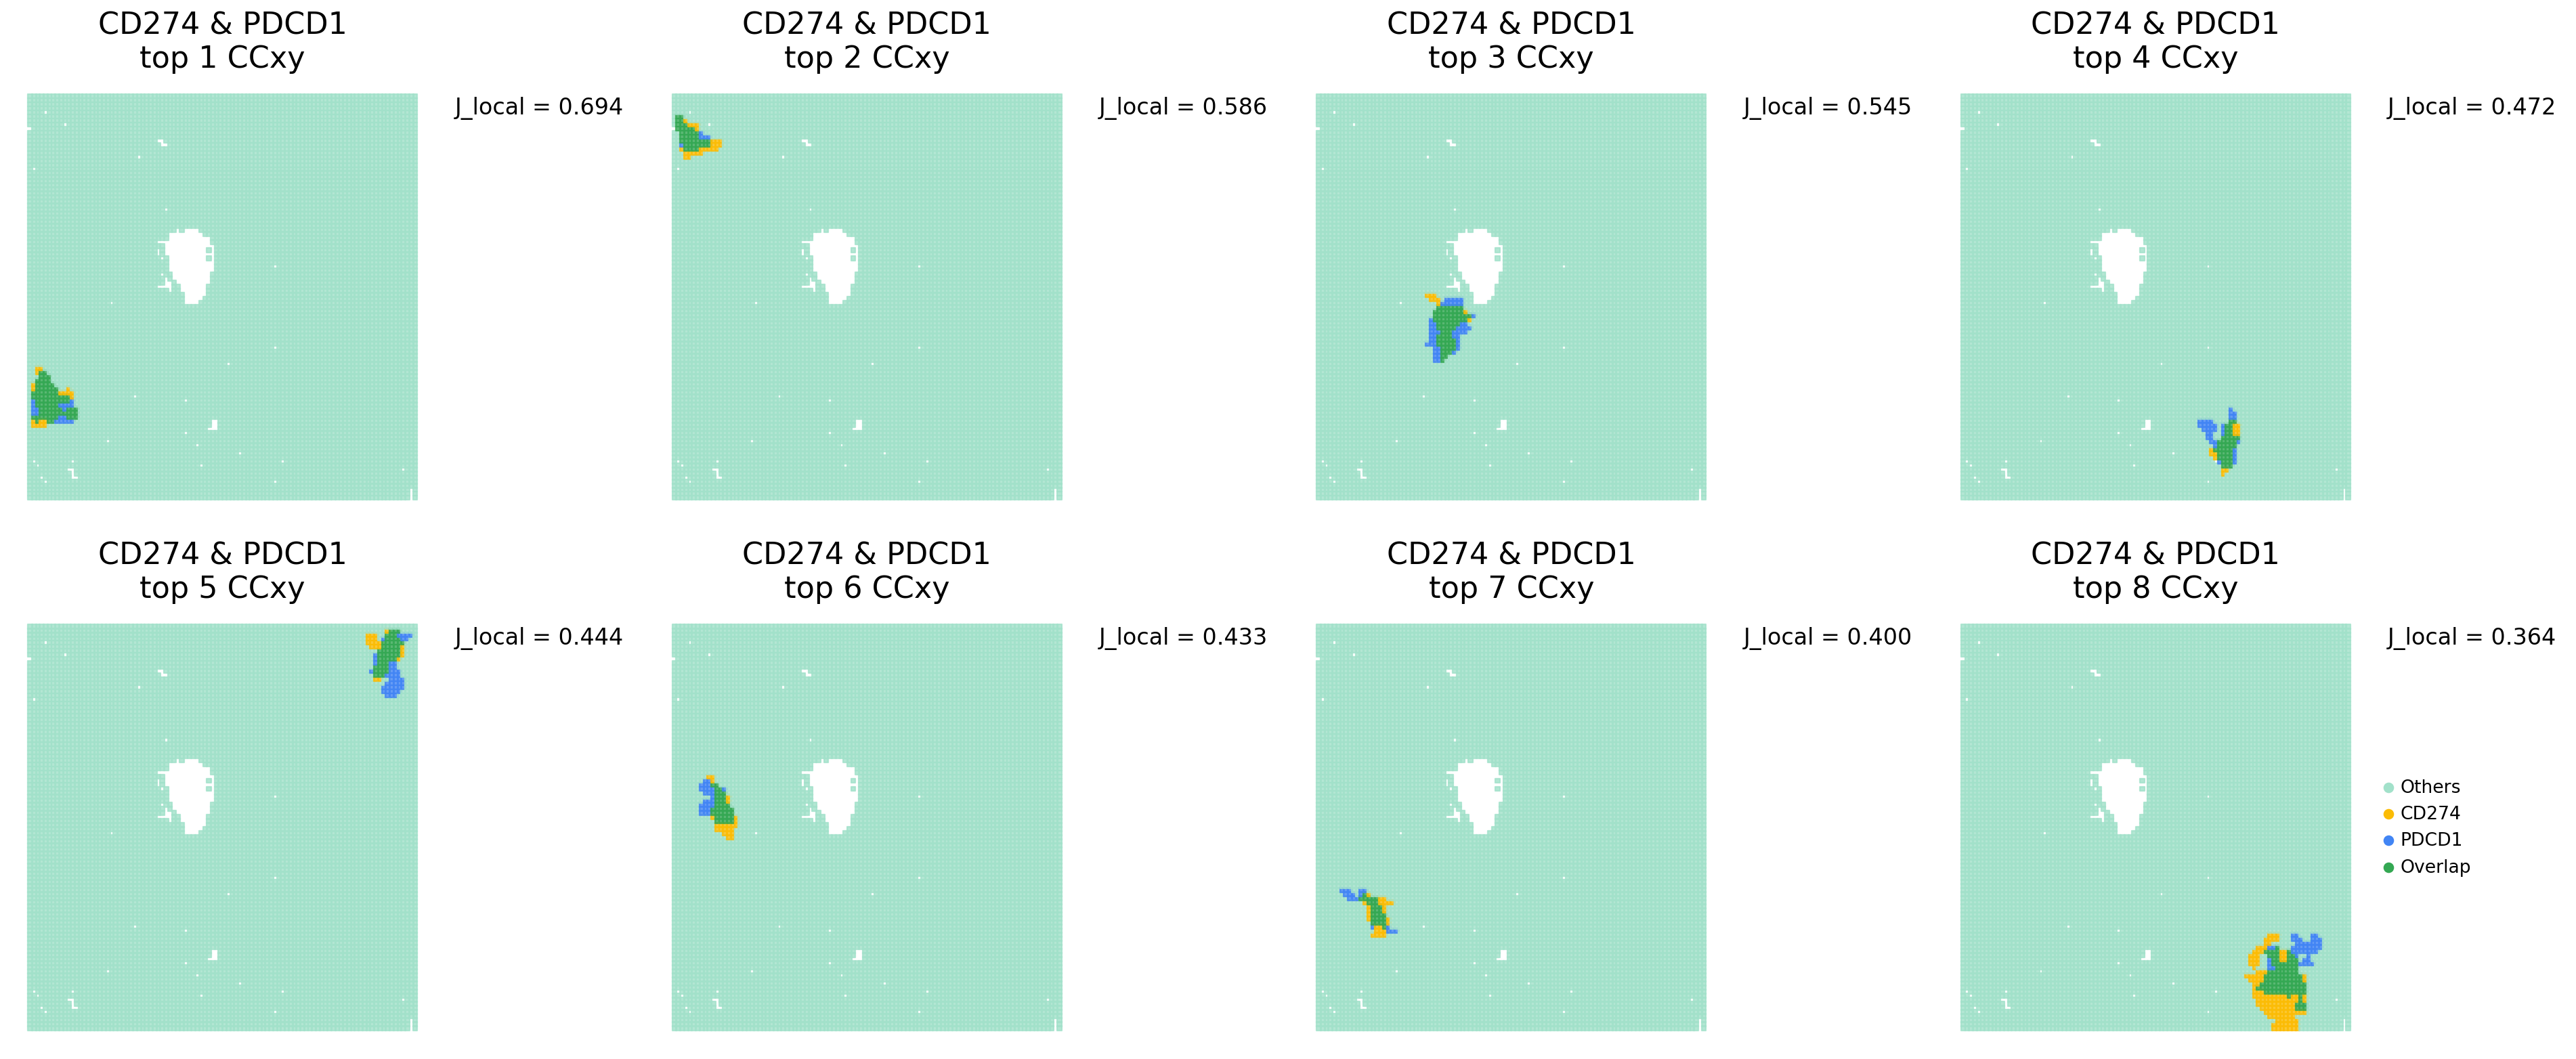

In [29]:
sp_adata.vis_jaccard_top_n_pair(feat_name_x='CD274', feat_name_y='PDCD1',
                                top_n = 8, ncol = 4, alpha = 0.8, dot_size=3,
                                fig_size = (6,5), title_fontsize = 20, legend_fontsize = 12,
                                title = '', return_axis=False, save=True, dpi=200)

### 3. Estimate cell-type specific L-R interaction

#### Load saved STopover object for cell-type specific analysis

In [30]:
sp_adata = STopover_cosmx(sp_load_path=os.path.join(save_dir, 'sp_grid_celltype_interact_adata.h5ad'), 
                          x_bins=100, y_bins=100, min_size=20, fwhm=2.5, thres_per=30, save_path=save_dir)

Anndata object is not provided: searching for files in 'sp_load_path'


In [31]:
sp_adata

AnnData object with n_obs × n_vars = 9762 × 980
    obs: 'array_col', 'array_row', 'Activated DCs', 'Alveolar Mac', 'B lymphocytes_ns', 'CD141+ DCs', 'CD163+CD14+ DCs', 'CD1c+ DCs', 'CD207+CD1a+ LCs', 'CD4+ Th', 'CD8 low T', 'CD8+/CD4+ Mixed Th', 'COL13A1+ matrix FBs', 'COL14A1+ matrix FBs', 'Cytotoxic CD8+ T', 'EPCs', 'Endothelial cells_ns', 'Epithelial cells_ns', 'Exhausted CD8+ T', 'Exhausted Tfh', 'Fibroblasts_ns', 'Follicular B cells', 'GC B cells in the DZ', 'GC B cells in the LZ', 'Lymphatic ECs', 'MALT B cells', 'MAST', 'Mesothelial cells', 'Monocytes', 'Myeloid cells_ns', 'Myofibroblasts', 'NK', 'NK cells_ns', 'Naive CD4+ T', 'Naive CD8+ T', 'Pericytes', 'Plasma cells', 'Pleural Mac', 'Smooth muscle cells', 'Stalk-like ECs', 'T lymphocytes_ns', 'Tip-like ECs', 'Treg', 'Tumor ECs', 'mo-Mac', 'pDCs', 'tS1', 'tS2', 'tS3', 'group', 'Comb_CC_Activated DCs', 'Comb_CC_Alveolar Mac', 'Comb_CC_B lymphocytes_ns', 'Comb_CC_CD141+ DCs', 'Comb_CC_CD163+CD14+ DCs', 'Comb_CC_CD1c+ DCs', 'Com

#### Caculate cell-type specific expession

In [32]:
sp_adata_ts2, sp_adata_cd8 = sp_adata.celltype_specific_adata(cell_types=['tS2','Cytotoxic CD8+ T'])

In [33]:
sp_adata_ts2, sp_adata_cd8

(AnnData object with n_obs × n_vars = 9762 × 980
     obs: 'array_col', 'array_row'
     uns: 'x_bins', 'y_bins', 'sc_norm_total', 'sc_celltype_colname', 'transcript_colname', 'min_size', 'fwhm', 'thres_per', 'obs_raw',
 AnnData object with n_obs × n_vars = 9762 × 973
     obs: 'array_col', 'array_row'
     uns: 'x_bins', 'y_bins', 'sc_norm_total', 'sc_celltype_colname', 'transcript_colname', 'min_size', 'fwhm', 'thres_per', 'obs_raw')

#### Visualize cell type-specific feature map

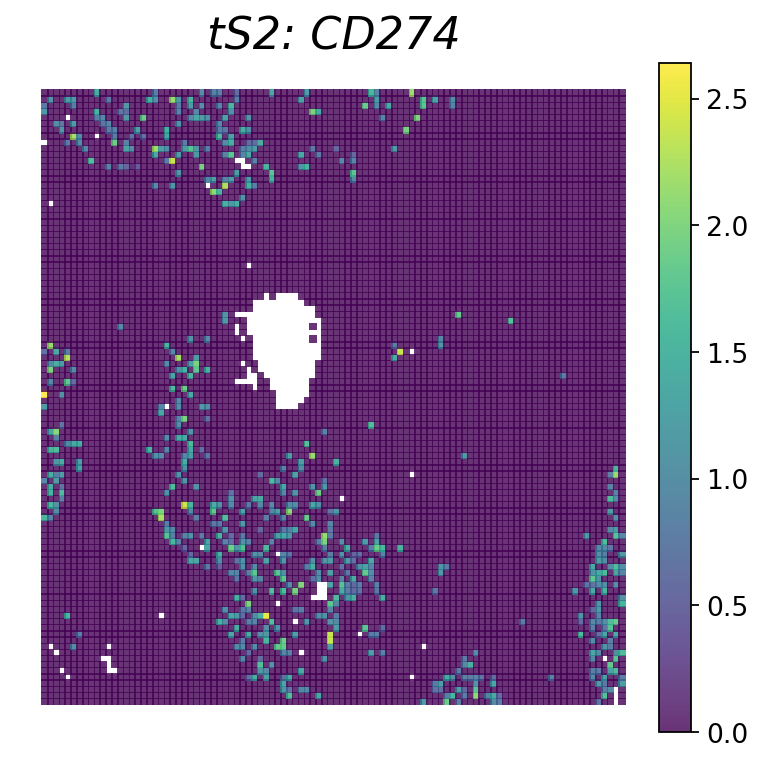

In [34]:
sp_adata_ts2.vis_spatial_cosmx(feat_name='CD274', title = 'tS2: ', fig_size=(5,5), title_fontsize=20, 
                               legend_fontsize=12, save=True, return_axis=False, dpi=200)

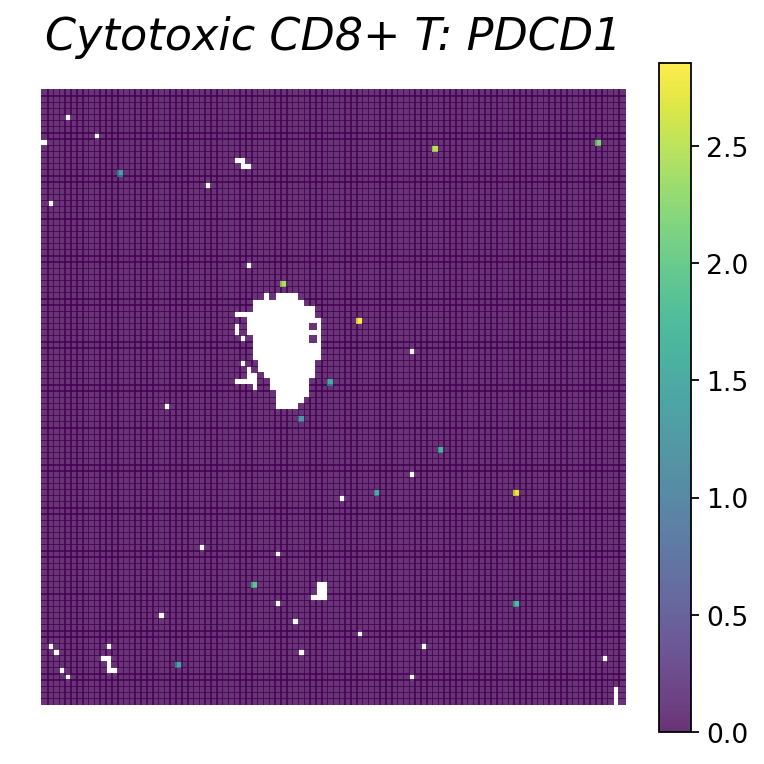

In [35]:
sp_adata_cd8.vis_spatial_cosmx(feat_name='PDCD1', title = 'Cytotoxic CD8+ T: ', fig_size=(5,5), title_fontsize=20, 
                               legend_fontsize=12, save=True, return_axis=False, dpi=200)

#### Extract cell type-specific L-R colocalization patterns

In [36]:
sp_adata_ts2_cd8 = sp_adata.topological_similarity_celltype_pair(celltype_x='tS2', celltype_y='Cytotoxic CD8+ T',
                                                                 use_lr_db=True, lr_db_species='human', J_result_name='result')

Calculating topological similarity between genes in 'tS2' and 'Cytotoxic CD8+ T'
Using CellTalkDB ligand-receptor dataset
End of data preparation
Elapsed time: 0.05 seconds 
Calculation for adjacency matrix and mask


  0%|          | 0/1 [00:00<?, ?it/s]

Calculation for connected components for each feature


  0%|          | 0/440 [00:00<?, ?it/s]

Calculation for composite jaccard indexes between feature pairs


  0%|          | 0/727 [00:00<?, ?it/s]

End of the whole process: 432.86 seconds


#### Save STopover object to the save_dir

In [37]:
sp_adata_ts2_cd8.save_connected_loc_data(save_format='h5ad', filename = 'cc_loc_smi_lr')

#### Load J_comp list for all cell-type specific LR pairs

In [38]:
J_result = sp_adata_ts2_cd8.uns['J_result_0']
J_result.sort_values(by=['J_comp'], ascending=False)

,group,Feat_1,Feat_2,Avg_1,Avg_2,J_comp
27,0,tS2: TIMP1,Cytotoxic CD8+ T: CD63,1.325875,0.035692,0.049815
80,0,tS2: VTN,Cytotoxic CD8+ T: ITGA5,0.444537,0.010011,0.035024
621,0,tS2: B2M,Cytotoxic CD8+ T: CD3D,1.958087,0.009682,0.033390
623,0,tS2: HLA-C,Cytotoxic CD8+ T: CD3D,1.845312,0.009682,0.031478
624,0,tS2: HLA-B,Cytotoxic CD8+ T: CD3D,1.359363,0.009682,0.031425
...,...,...,...,...,...,...
328,0,tS2: FGG,Cytotoxic CD8+ T: TLR4,0.131741,0.004691,0.000000
314,0,tS2: FGF13,Cytotoxic CD8+ T: FGFR3,0.116736,0.001581,0.000000
313,0,tS2: FGF13,Cytotoxic CD8+ T: FGFR2,0.116736,0.000924,0.000000
310,0,tS2: ANGPT2,Cytotoxic CD8+ T: TIE1,0.088911,0.000900,0.000000


#### Visualize colocalized regions of a cell type-specific LR

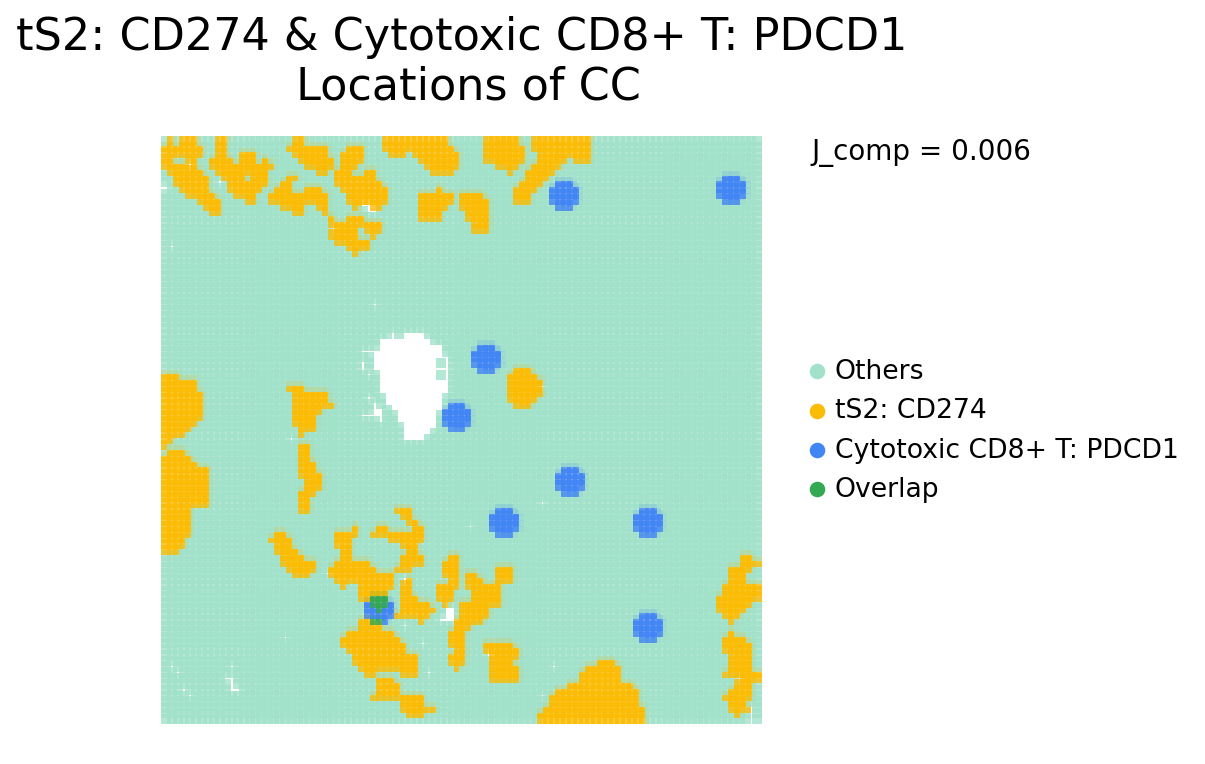

In [39]:
sp_adata_ts2_cd8.vis_all_connected(feat_name_x='tS2: CD274', feat_name_y='Cytotoxic CD8+ T: PDCD1',
                                   alpha = 0.8, 
                                   fig_size=(7,5), title_fontsize = 20, legend_fontsize = 12, 
                                   title = '\n Locations of CC', return_axis=False, save=True)

#### Visualize top 8 regions with high local overlap

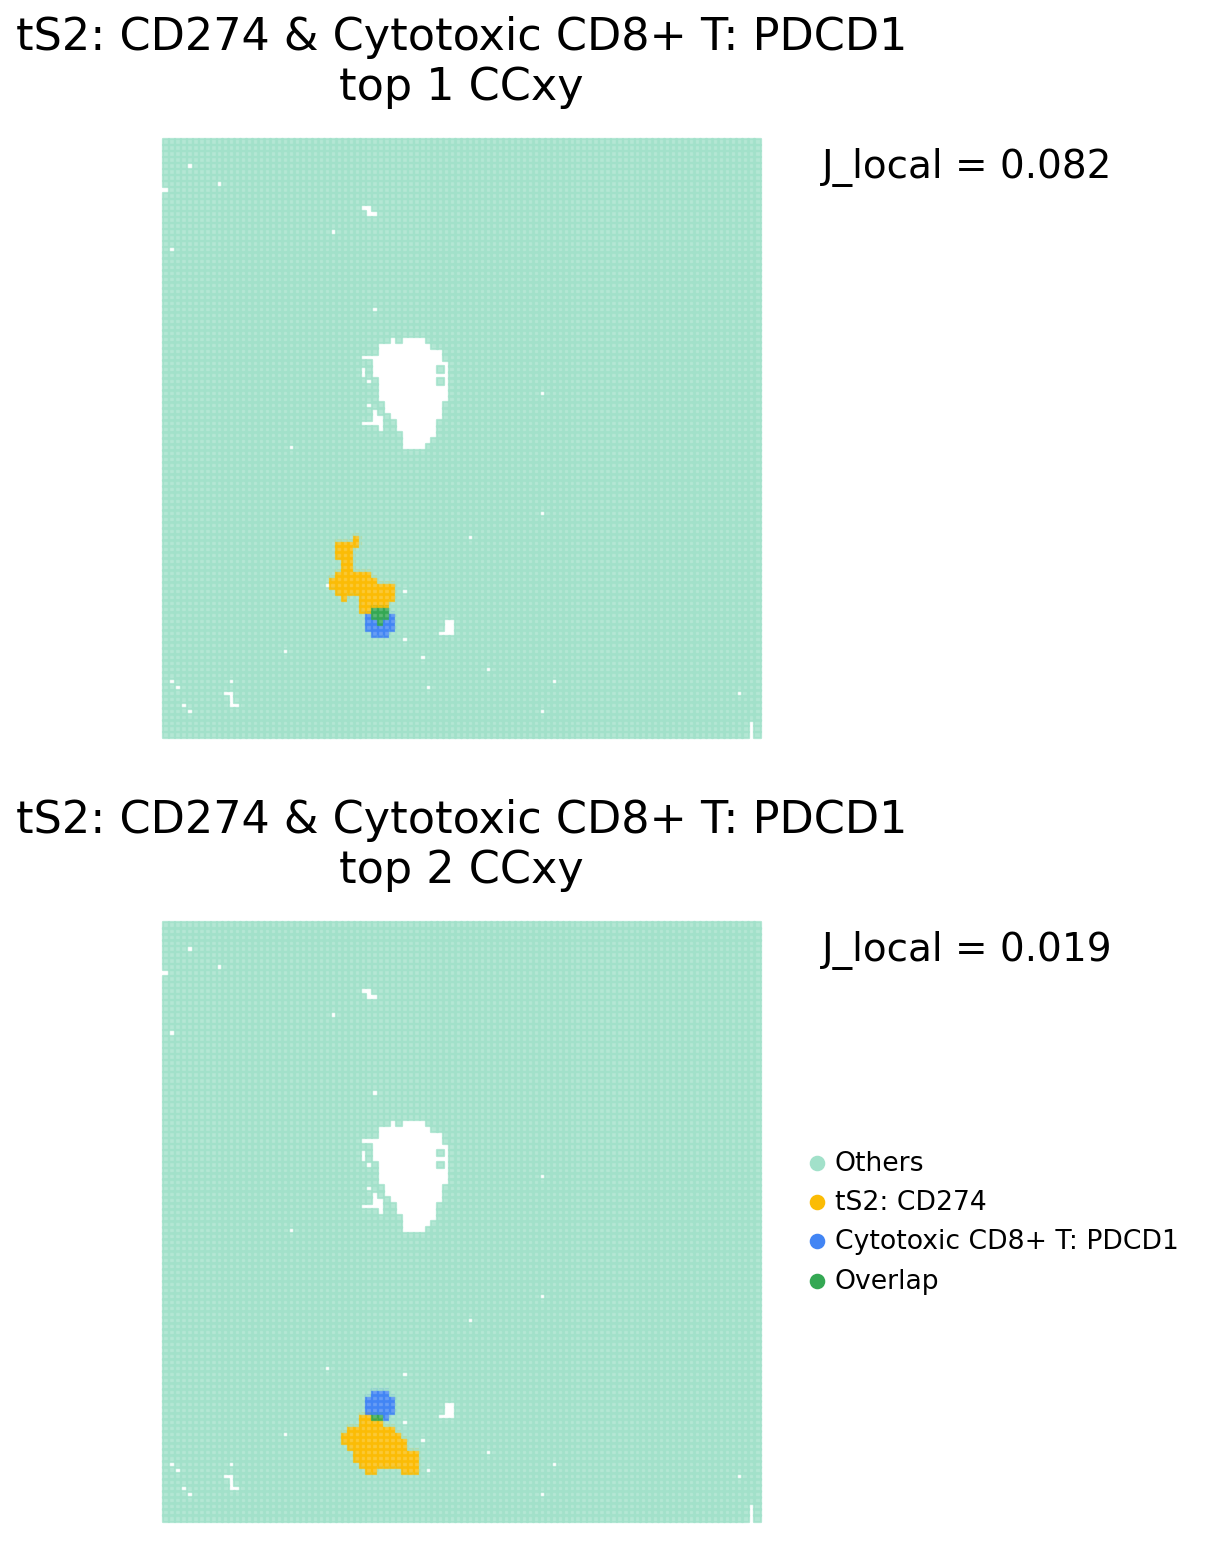

In [40]:
sp_adata_ts2_cd8.vis_jaccard_top_n_pair(feat_name_x='tS2: CD274', feat_name_y='Cytotoxic CD8+ T: PDCD1',
                                        top_n = 2, ncol = 1, alpha = 0.8, dot_size=3,
                                        fig_size = (7,5), title_fontsize = 20, legend_fontsize = 12,
                                        title = '', return_axis=False, save=True, dpi=200)